# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly
%pip install mplcursors

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('./data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('./data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('./data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('./data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('./data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(f'{df_hh_income.columns}\n')
print(f'{df_pct_poverty.columns}\n')
print(f'{df_pct_completed_hs.columns}\n')
print(f'{df_share_race_city.columns}\n')
print(f'{df_fatalities.columns}\n')

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')



In [7]:
# Fill NaN values in 'Median Income' column with 0
df_hh_income['Median Income'] = df_hh_income['Median Income'].fillna(0)

# Check for NaN values in each DataFrame
nan_values = {
    'df_hh_income': df_hh_income.isna().sum(),
    'df_pct_poverty': df_pct_poverty.isna().sum(),
    'df_pct_completed_hs': df_pct_completed_hs.isna().sum(),
    'df_share_race_city': df_share_race_city.isna().sum(),
    'df_fatalities': df_fatalities.isna().sum()
}

# Print the results in a more professional format
for df_name, nan_count in nan_values.items():
    print(f"NaN values in {df_name}:")
    print(nan_count)
    print("\n")


NaN values in df_hh_income:
Geographic Area    0
City               0
Median Income      0
dtype: int64


NaN values in df_pct_poverty:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64


NaN values in df_pct_completed_hs:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64


NaN values in df_share_race_city:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64


NaN values in df_fatalities:
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee               

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [8]:
df_fatalities[df_fatalities.age.isna()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [9]:
df_pct_poverty.tail()

# # converting the poverty_rate to float data type
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')


# # grouping by  US_state
us_state_poverty = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate': 'mean'}).reset_index()

us_state_poverty.sort_values(by='poverty_rate', ascending=False).reset_index(drop=True)

,Geographic Area,poverty_rate
0,MS,26.88
1,AZ,25.67
2,GA,23.78
3,NM,23.08
4,AR,22.96
5,LA,22.34
6,SC,22.16
7,WV,21.13
8,OK,20.66
9,AL,20.65


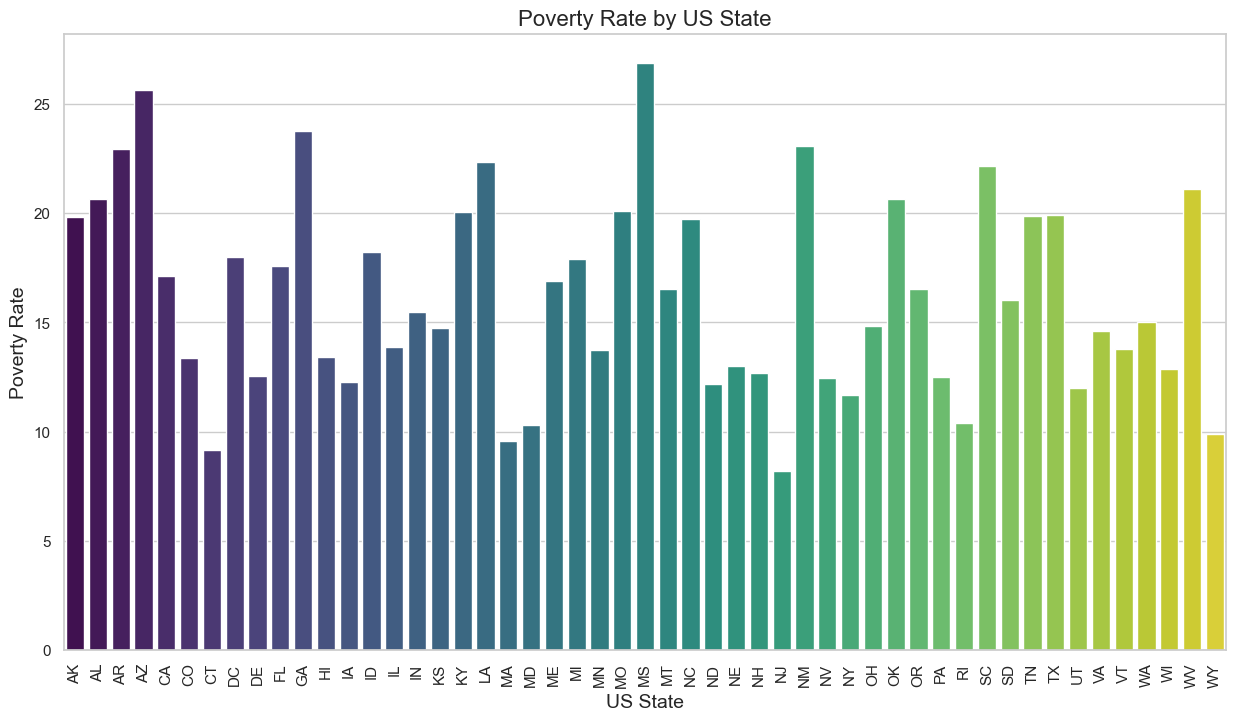

In [10]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# creating the bar chart
ax = sns.barplot(data=us_state_poverty,
                 x='Geographic Area',
                 y='poverty_rate',
                 palette='viridis',
                 hue='Geographic Area'
                 
                 )

# setting the title and labels
ax.set_title('Poverty Rate by US State', fontsize=16)
ax.set_xlabel('US State', fontsize=14)
ax.set_ylabel('Poverty Rate', fontsize=14)

# rotating the x labels for better readability
plt.xticks(rotation=90)

plt.show()



# Chart the High School Graduation Rate by US State

Showing  the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

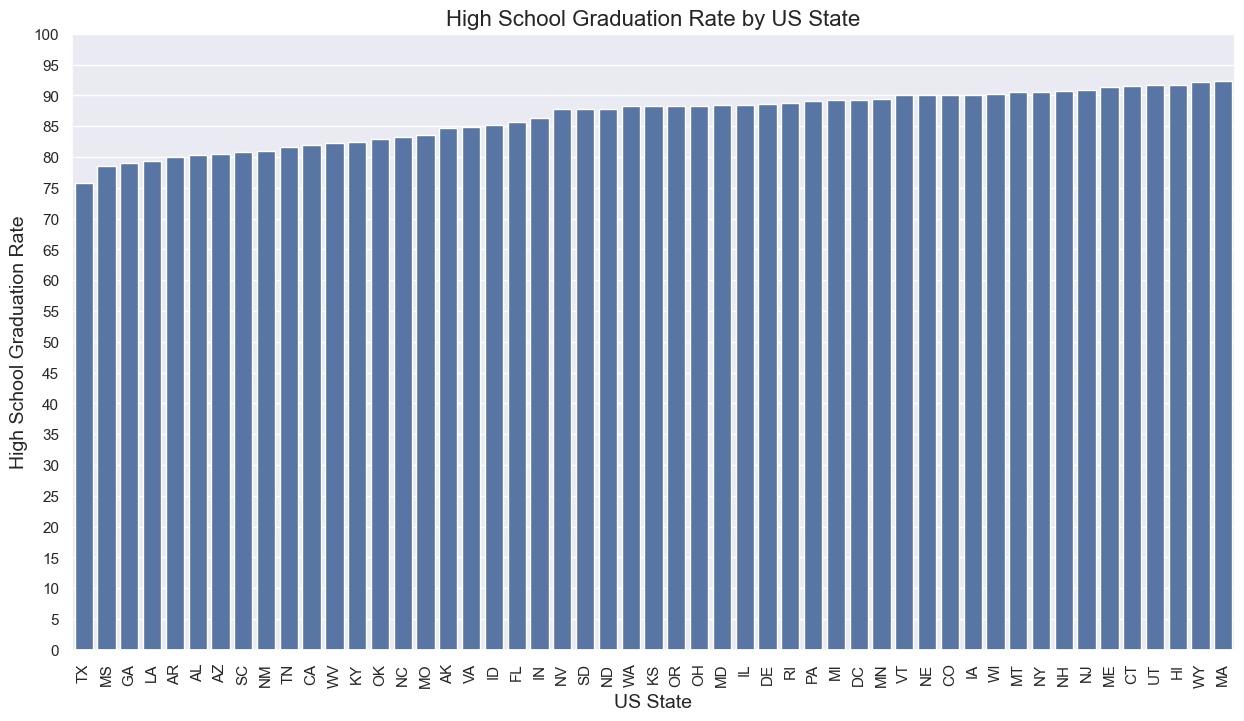

In [11]:
df_pct_completed_hs.tail()

# converting the percent_completed_hs as float
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# grouping the data
hs_grad_rate = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs': 'mean'}).reset_index()

# sorting in ascending order
hs_grad_rate = hs_grad_rate.sort_values(by='percent_completed_hs', ascending=True).reset_index(drop=True)

plt.figure(figsize=(15, 8))
# sns.set(style="whitegrid")

sns.set_theme(style='darkgrid')

# creating the bar chart
ax = sns.barplot(data=hs_grad_rate,
                 x='Geographic Area',
                 y='percent_completed_hs',

                 )

# setting the title and labels
ax.set_title('High School Graduation Rate by US State', fontsize=16)
ax.set_xlabel('US State', fontsize=14)
ax.set_ylabel('High School Graduation Rate', fontsize=14)

# rotating the x labels for better readability
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 101, 5))


plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Creating a line chart with two y-axes to show if the rates of poverty and high school graduation move together.  

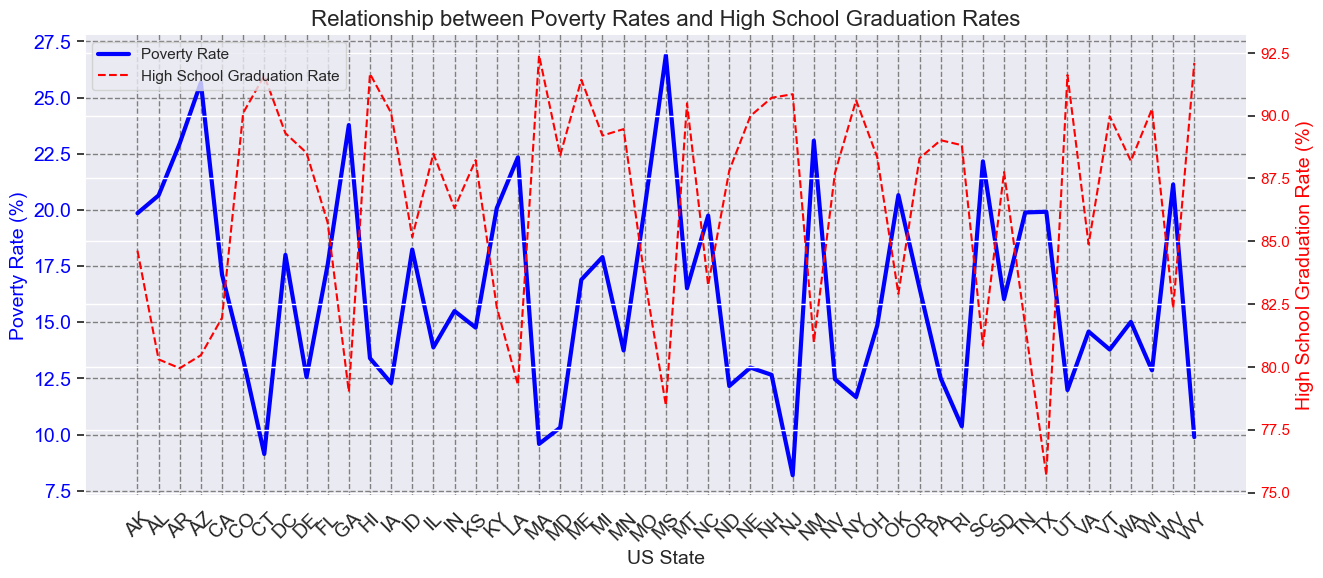

In [12]:
plt.figure(figsize=(15, 6))
plt.grid(color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks(rotation=45, fontsize=14)

# twining the graphs
ax1 = plt.gca()
ax2 = ax1.twinx()

# Ensure the order of x-axis values is the same for both plots
hs_grad_rate_sorted = hs_grad_rate.set_index('Geographic Area').loc[us_state_poverty['Geographic Area']].reset_index()

ax1.plot(us_state_poverty['Geographic Area'], us_state_poverty['poverty_rate'], color='blue', linestyle='-', linewidth=3, label='Poverty Rate')
ax2.plot(hs_grad_rate_sorted['Geographic Area'], hs_grad_rate_sorted['percent_completed_hs'], color='red', linestyle='--', label='High School Graduation Rate')

ax1.set_xlabel('US State', fontsize=14)
ax1.set_ylabel('Poverty Rate (%)', color='blue', fontsize=14)
ax2.set_ylabel('High School Graduation Rate (%)', color='red', fontsize=14)

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Relationship between Poverty Rates and High School Graduation Rates', fontsize=16)
plt.show()

In [13]:
# merging the datbase
merged_df = pd.merge(us_state_poverty, hs_grad_rate, on='Geographic Area')
merged_df.head()

,Geographic Area,poverty_rate,percent_completed_hs
0,AK,19.85,84.63
1,AL,20.65,80.30
2,AR,22.96,79.95
3,AZ,25.67,80.47
4,CA,17.12,81.96


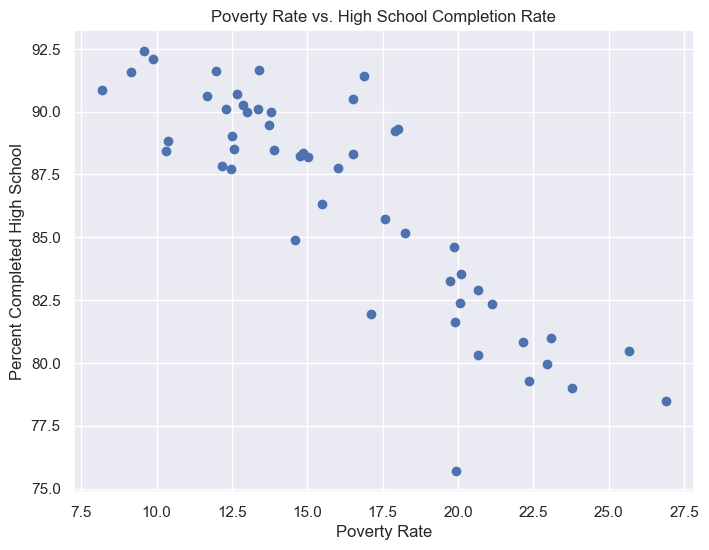

In [14]:
# @title Poverty Rate vs. High School Completion Rate

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['poverty_rate'], merged_df['percent_completed_hs'])
plt.xlabel('Poverty Rate')
plt.ylabel('Percent Completed High School')
_ = plt.title('Poverty Rate vs. High School Completion Rate')
# plt.show()

####  using a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

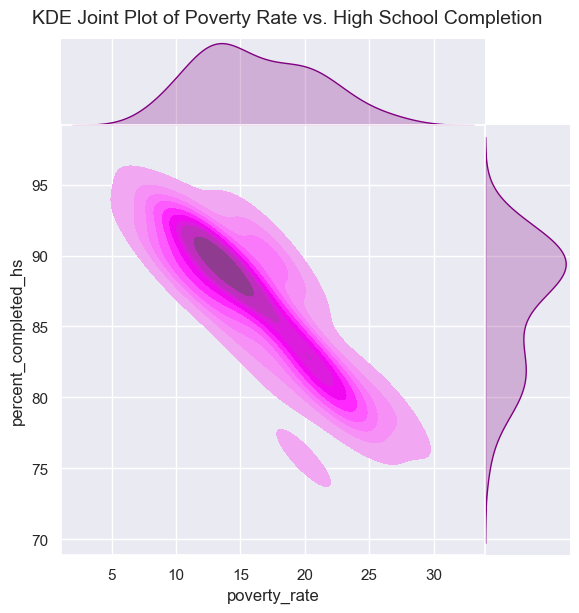

In [15]:
# Create a jointplot with KDE
sns.jointplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    kind='kde',  # Use KDE for the joint plot
    fill=True,   # Fill the contours for KDE
    color='purple',
    space=0       # Minimize space between the joint and marginal plots
)

# Add a title
plt.suptitle("KDE Joint Plot of Poverty Rate vs. High School Completion",
             fontsize=14, y=1.02)

plt.show()


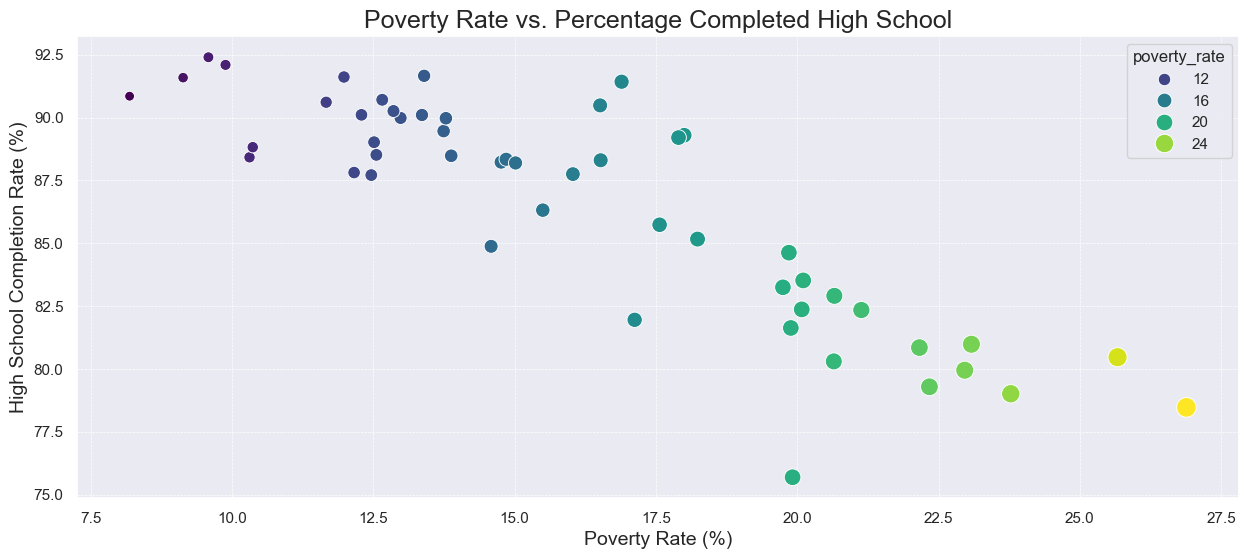

In [16]:
# Set up the figure size for consistency
plt.figure(figsize=(15, 6))

sns.set_style(style='darkgrid')
# Create the scatter plot using seaborn
scatter_plot = sns.scatterplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    hue='poverty_rate',
    palette='viridis',
    size='poverty_rate',
    sizes=(50, 200),
)

# Customize the plot
scatter_plot.set_title('Poverty Rate vs. Percentage Completed High School', fontsize=18)
scatter_plot.set_xlabel('Poverty Rate (%)', fontsize=14)
scatter_plot.set_ylabel('High School Completion Rate (%)', fontsize=14)
scatter_plot.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

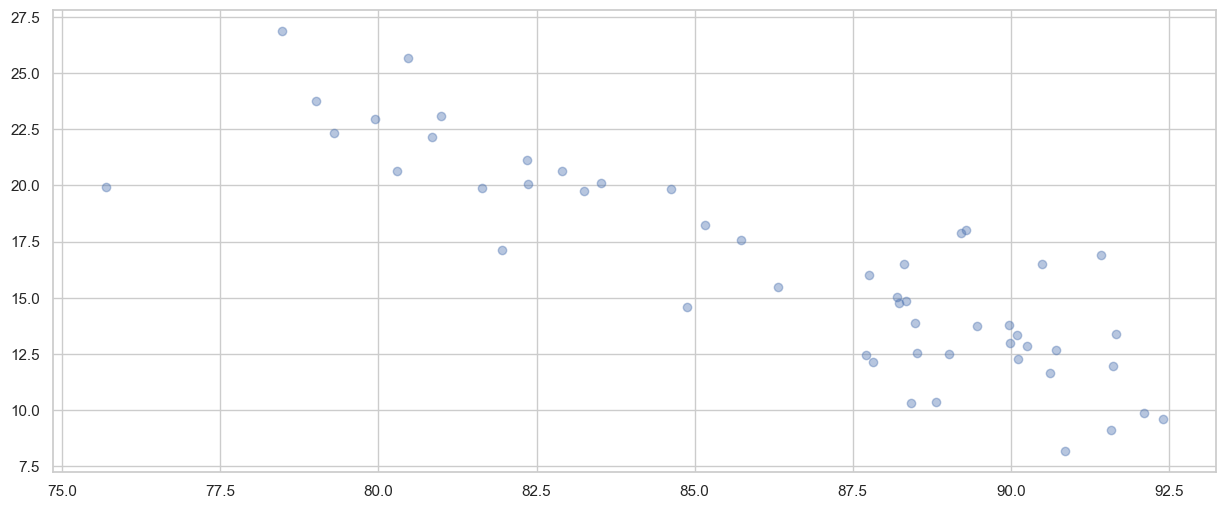

In [17]:
#Seaborn's .lmplot()  to show a linear regression between the poverty ratio and the high school graduation ratio.

# Set up the figure size for consistency
plt.figure(figsize=(15, 6))
with sns.axes_style('whitegrid'):
  fig = sns.regplot(
      merged_df,
      x= merged_df['percent_completed_hs'],
      y= merged_df['poverty_rate'],
      lowess= True,
      scatter_kws = {'alpha': 0.4},
      line_kws={'color': 'black'})

plt.show()

<Figure size 1500x600 with 0 Axes>

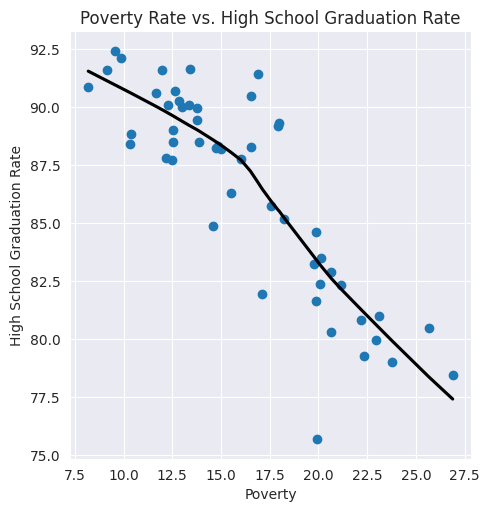

In [ ]:
plt.figure(figsize=(15, 6))


# using .lmplot for the merged_df

with sns.axes_style('darkgrid'):
  fig = sns.lmplot(
      merged_df,
      x = 'poverty_rate',
      y = 'percent_completed_hs',
      lowess=True,
      scatter_kws={'alpha': 1},
      line_kws={'color': 'black'}
      )
  plt.xlabel('Poverty')
  plt.ylabel('High School Graduation Rate')
  plt.title('Poverty Rate vs. High School Graduation Rate')
  plt.show()


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

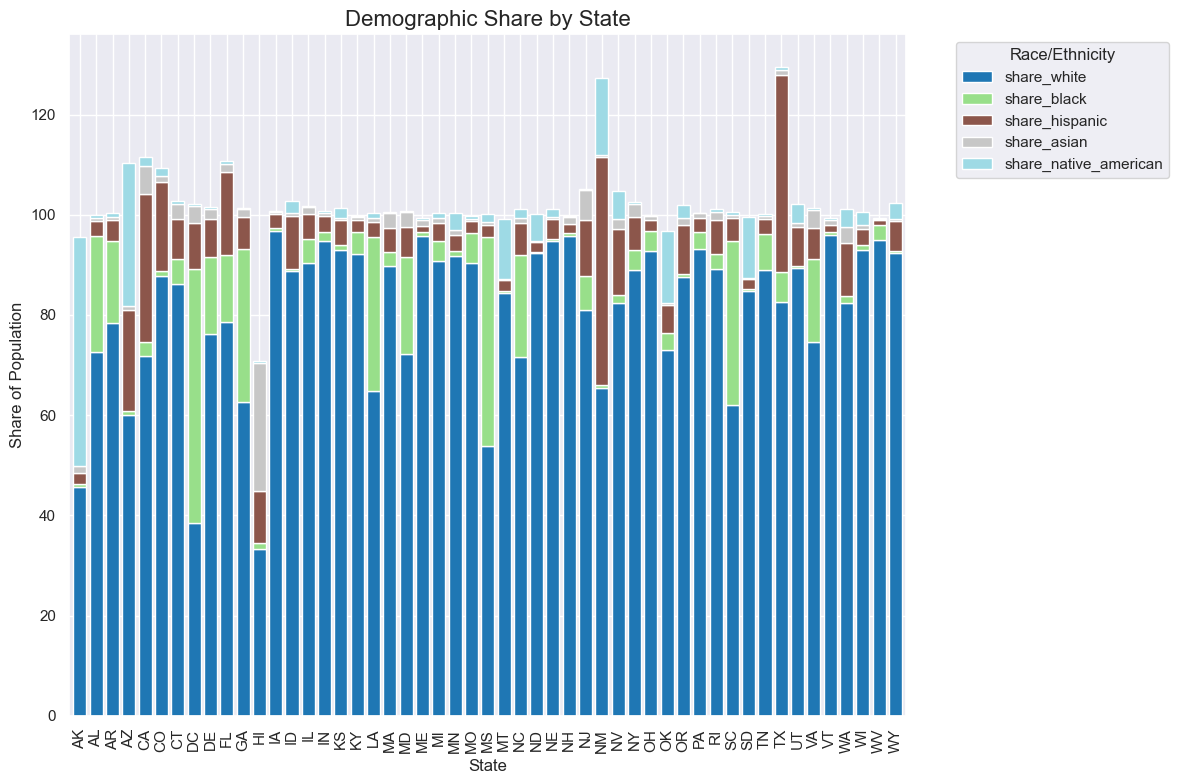

In [ ]:
import mplcursors

# Ensure numeric conversion for the required columns
columns_to_convert = ['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']
for column in columns_to_convert:
    df_share_race_city[column] = pd.to_numeric(df_share_race_city[column], errors='coerce')

# Group by 'Geographic area' and calculate mean for numeric columns
numeric_columns = ['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']
df_state_race = df_share_race_city.groupby('Geographic area', as_index=False)[numeric_columns].mean()

# Set 'Geographic area' as index for the plotting
df_state_race.set_index('Geographic area', inplace=True)

# Create a stacked bar chart
ax = df_state_race.plot(kind='bar',
             stacked=True,
             figsize=(12, 8),
             colormap='tab20',
             width=0.8)

# Set title and labels
ax.set_title('Demographic Share by State', fontsize=16)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Share of Population', fontsize=12)

# Add legend
ax.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add hover effect using mplcursors
mplcursors.cursor(hover=True)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
df_share_race_city.head()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


## Create Donut Chart by of People Killed by Race

In [ ]:
df_fatalities.race.isna().sum()

clean_df_fatalities = df_fatalities.dropna(subset=['race'])

race_counts = clean_df_fatalities['race'].value_counts()

# Rename the race codes to full names
race_counts = race_counts.rename(index={
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other'
})

race_counts

race
White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Other                28
Name: count, dtype: int64

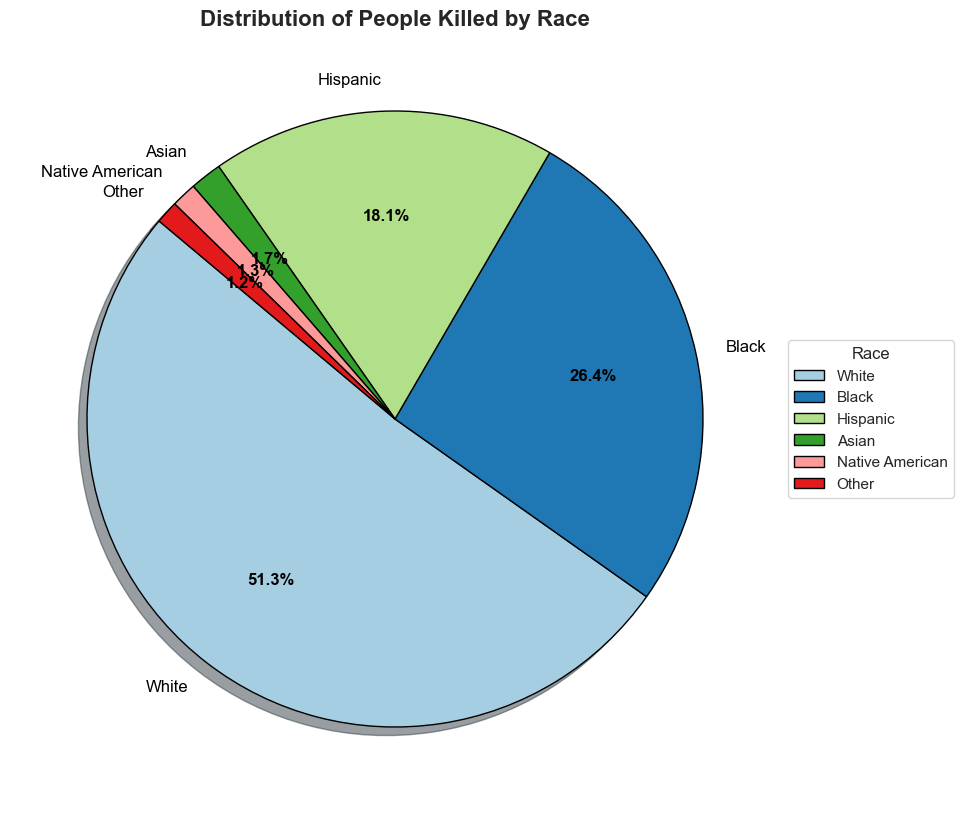

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")

# Define a color palette
colors = sns.color_palette("Paired", len(race_counts))

# Function to format the autopct text
def autopct_format(pct):
    return f'{pct:.1f}%'

# Creating a pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    race_counts.values, 
    labels=race_counts.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}, 
    shadow=True
)

# Customize the text and autotext
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_weight('bold')
    # Move the autotext outside the pie chart
    autotext.set_position((1.1 * autotext.get_position()[0], 1.1 * autotext.get_position()[1]))

# Adding a title
plt.title('Distribution of People Killed by Race', fontsize=16, fontweight='bold')

# Adding a legend
plt.legend(wedges, race_counts.index, title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

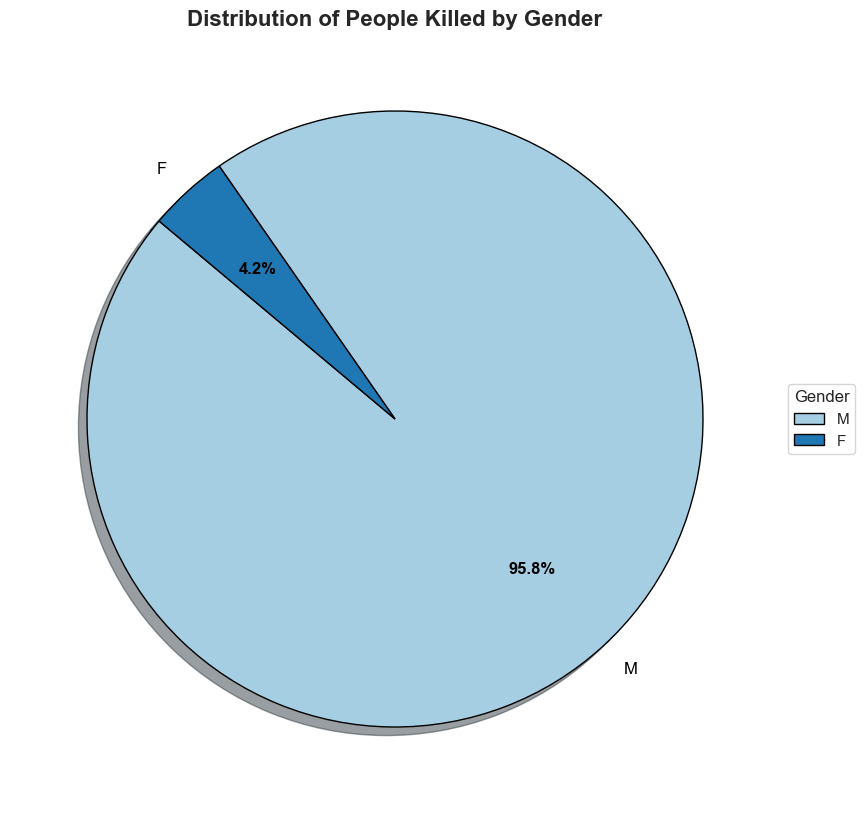

In [ ]:


# Create a pie chart using matplotlib
plt.figure(figsize=(10, 10))
colors = sns.color_palette("Paired", len(gender_deaths_df))

# Function to format the autopct text
def autopct_format(pct):
    return f'{pct:.1f}%'

# Creating a pie chart
wedges, texts, autotexts = plt.pie(
    gender_deaths_df.values, 
    labels=gender_deaths_df.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}, 
    shadow=True
)

# Customize the text and autotext
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_weight('bold')
    # Move the autotext outside the pie chart
    autotext.set_position((1.1 * autotext.get_position()[0], 1.1 * autotext.get_position()[1]))

# Adding a title
plt.title('Distribution of People Killed by Gender', fontsize=16, fontweight='bold')

# Adding a legend
plt.legend(wedges, gender_deaths_df.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.show()

# Plot Showing the Age and Manner of Death

Is there a difference between men and women in the manner of death?

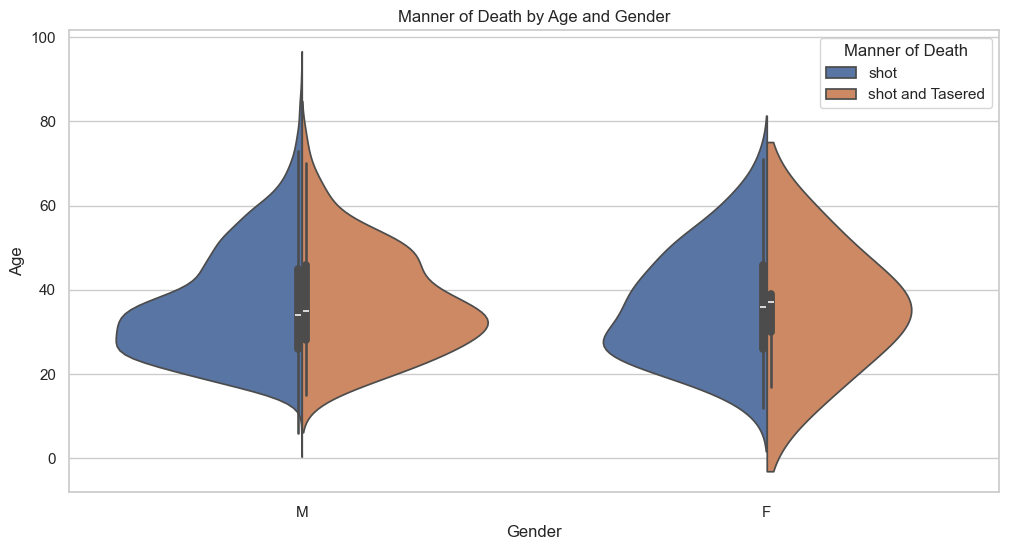

In [ ]:
# Check for NaN values in 'manner_of_death' column
df_fatalities.manner_of_death.isna().sum()

# Group the data by gender and manner of death, and count the occurrences
manner_of_death_df = df_fatalities.groupby(['gender', 'manner_of_death']).agg(death_count=('age', 'count')).reset_index()

# Display the first few rows of the DataFrame
manner_of_death_df.head()

# Create a violin plot for data visualization using seaborn
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_fatalities, x='gender', y='age', hue='manner_of_death', split=True)
plt.title('Manner of Death by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Manner of Death')
plt.show()


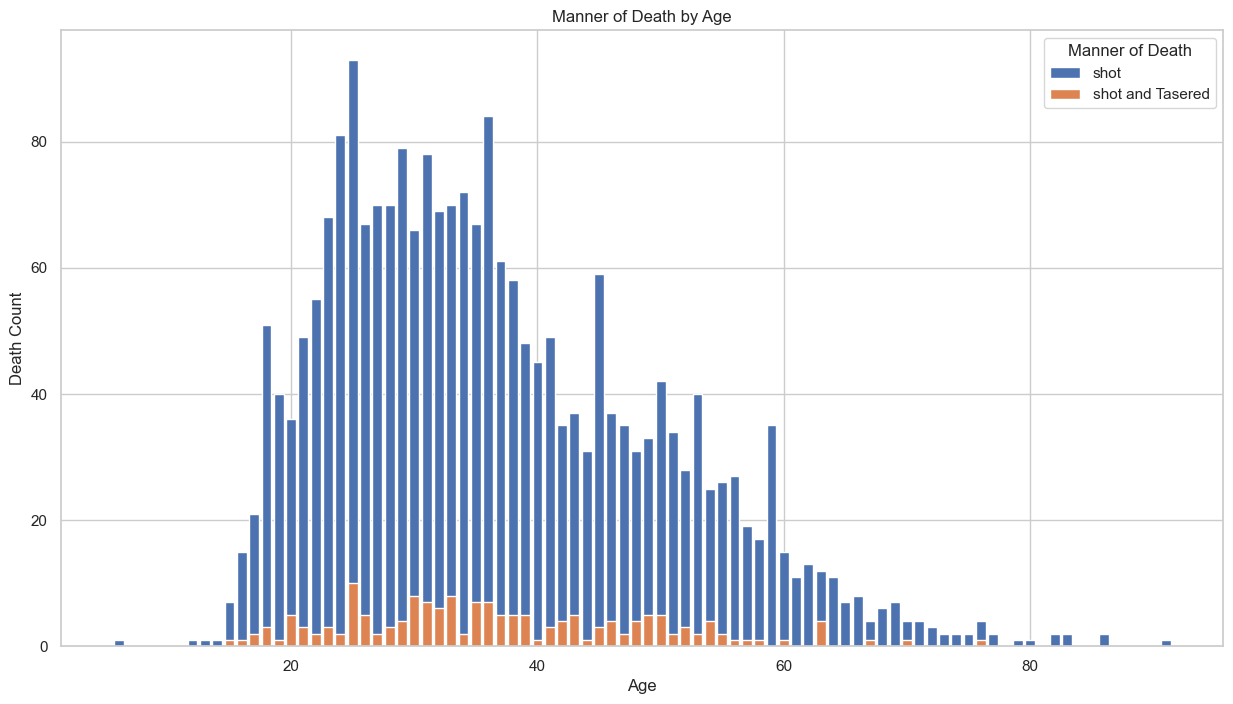

In [ ]:
# Group the data by age and manner of death, and count the occurrences
age_manner_of_death_df = df_fatalities.groupby(['age', 'manner_of_death']).agg(death_count=('gender', 'count')).reset_index()
age_manner_of_death_df.head()

# # Create a bar chart using matplotlib
plt.figure(figsize=(15, 8))
for manner in age_manner_of_death_df['manner_of_death'].unique():
    subset = age_manner_of_death_df[age_manner_of_death_df['manner_of_death'] == manner]
    plt.bar(subset['age'], subset['death_count'], label=manner)

plt.title('Manner of Death by Age')
plt.xlabel('Age')
plt.ylabel('Death Count')
plt.legend(title='Manner of Death')
plt.show()



# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

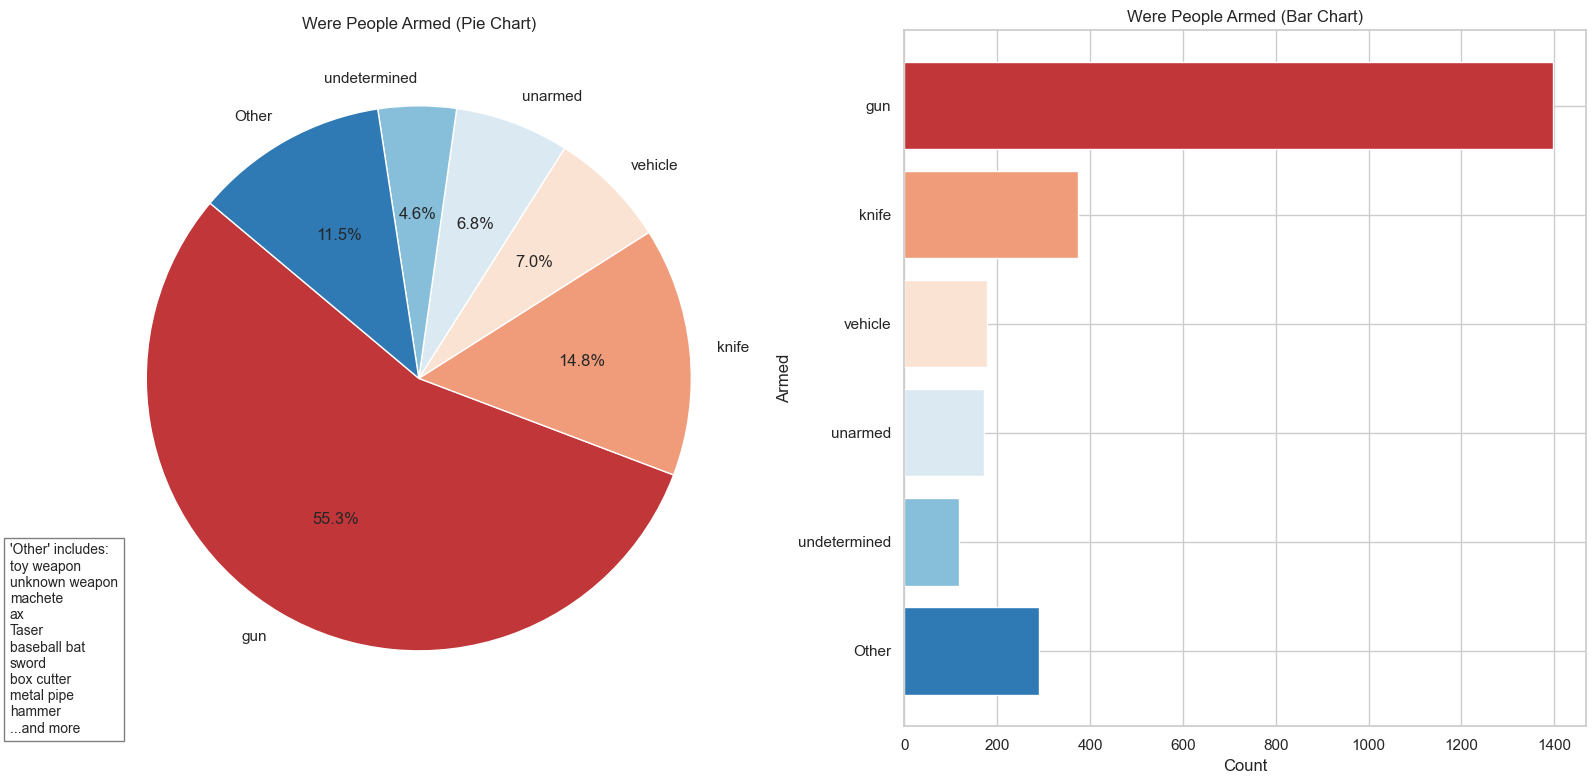

In [ ]:

# Group the 'armed' column and count the occurrences
armed_counts = df_fatalities['armed'].value_counts()

# Get the top 5 categories
top_5_armed = armed_counts.nlargest(5)

# Sum the remaining categories into 'Other' and list them
other_categories = armed_counts.iloc[5:].index.tolist()  # List of 'Other' categories
other_armed_count = armed_counts.iloc[5:].sum()

# Create a new Series with the top 5 and 'Other' using pd.concat
armed_df = pd.concat([top_5_armed, pd.Series({'Other': other_armed_count})])

# Create subplots using plt.subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Subplot 1: Pie Chart
ax[0].pie(
    armed_df.values, 
    labels=armed_df.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("RdBu", len(armed_df))
)
ax[0].set_title('Were People Armed (Pie Chart)')

# Add label showing what 'Other' includes
other_text = "\n".join(other_categories[:10])  # Show only first 10 categories for brevity
if len(other_categories) > 10:
    other_text += "\n...and more"
    
ax[0].text(
    -1.5, -1.3, 
    f"'Other' includes:\n{other_text}", 
    fontsize=10, 
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='black')
)

# Subplot 2: Horizontal Bar Chart
ax[1].barh(
    armed_df.index, 
    armed_df.values, 
    color=sns.color_palette("RdBu", len(armed_df))
)
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Armed')
ax[1].set_title('Were People Armed (Bar Chart)')
ax[1].invert_yaxis()  # Invert y-axis for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
# Check for NaN values in 'age' column
nan_age_count = df_fatalities.age.isna().sum()
print(f"Number of NaN values in 'age' column: {nan_age_count}")

# Drop NaN values for the age
clean_fatalities = df_fatalities.dropna(subset=['age'])

# Count the number of people killed by age
age_df = clean_fatalities.age.value_counts().sort_index()
print("Age distribution of people killed:")
print(age_df.head())

# Calculate the percentage of people killed who were under 25 years old
under_25_df = age_df[age_df.index < 25]
under_25_death_pct = under_25_df.sum() / age_df.sum() * 100
print(f"Percentage of people killed who were under 25 years old: {under_25_death_pct:.2f}%")


Number of NaN values in 'age' column: 77
Age distribution of people killed:
age
6.00     1
12.00    1
13.00    1
14.00    1
15.00    8
Name: count, dtype: int64
Percentage of people killed who were under 25 years old: 18.31%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

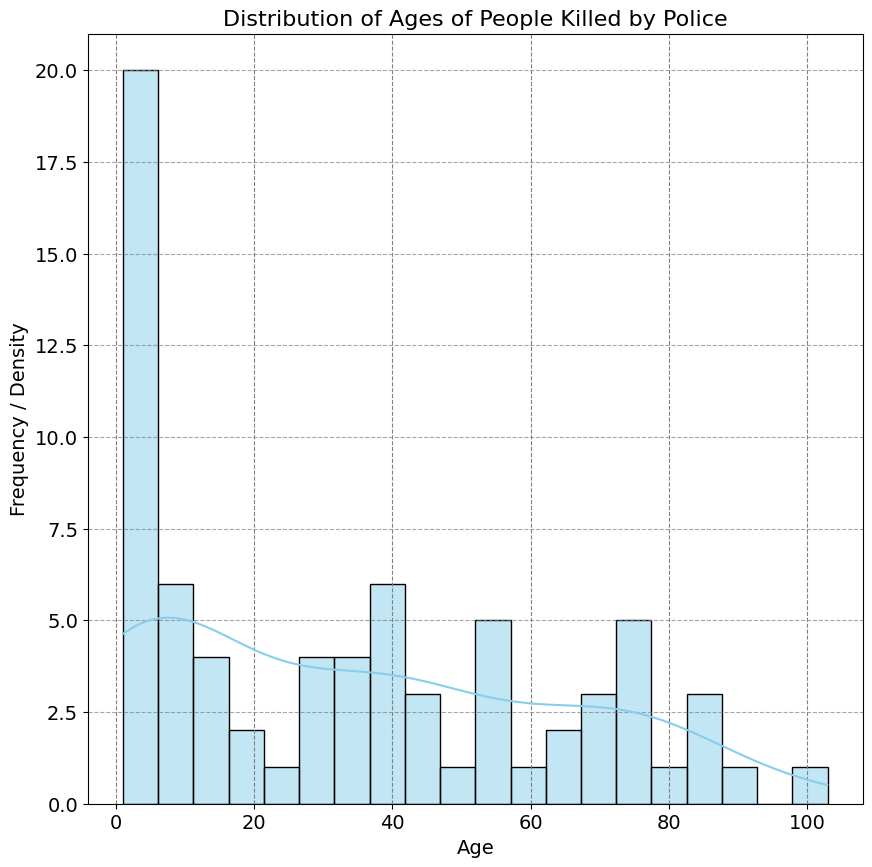

In [ ]:
# creating a histplot and KDE plot using sns

plt.figure(figsize=(10, 10))
plt.grid(color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks( fontsize=14)
with sns.axes_style('darkgrid'):
  fig = sns.histplot(
      age_df,
      bins=20,
      kde=True,
      color= 'skyblue',
      alpha=0.5,
      edgecolor='black'
  )
  # Customizing the plot
  plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
  plt.xlabel('Age', fontsize=14)
  plt.ylabel('Frequency / Density', fontsize=14)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()



Create a seperate KDE plot for each race. Is there a difference between the distributions?

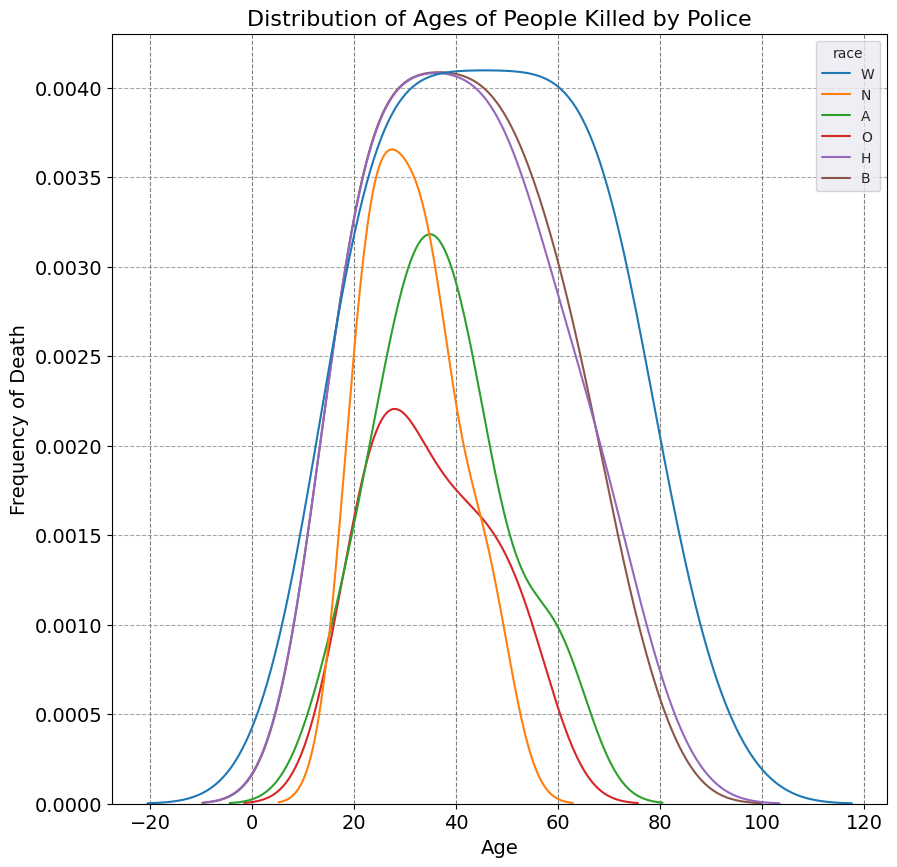

In [ ]:
df_fatalities.race.isna().sum()

# dropping NaN values for the races
clean_fatalities = df_fatalities.dropna(subset=['race'])
clean_fatalities.head()

# grouping no of people killed by race
race_df = clean_fatalities.groupby(['age', 'race']).agg(race_death_count=('race', 'count')).reset_index()
race_df.sort_values('race_death_count', ascending=True, inplace=True)

race_df.head()

# creating a KDE plot for each race
plt.figure(figsize=(10, 10))
plt.grid(color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks( fontsize=14)
with sns.axes_style('darkgrid'):
  fig = sns.kdeplot(
      data=race_df,
      x='age',
      hue='race',

  )
  # Customizing the plot
  plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
  plt.xlabel('Age', fontsize=14)
  plt.ylabel('Frequency of Death', fontsize=14)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()







# Race of People Killed

Create a chart that shows the total number of people killed by race.

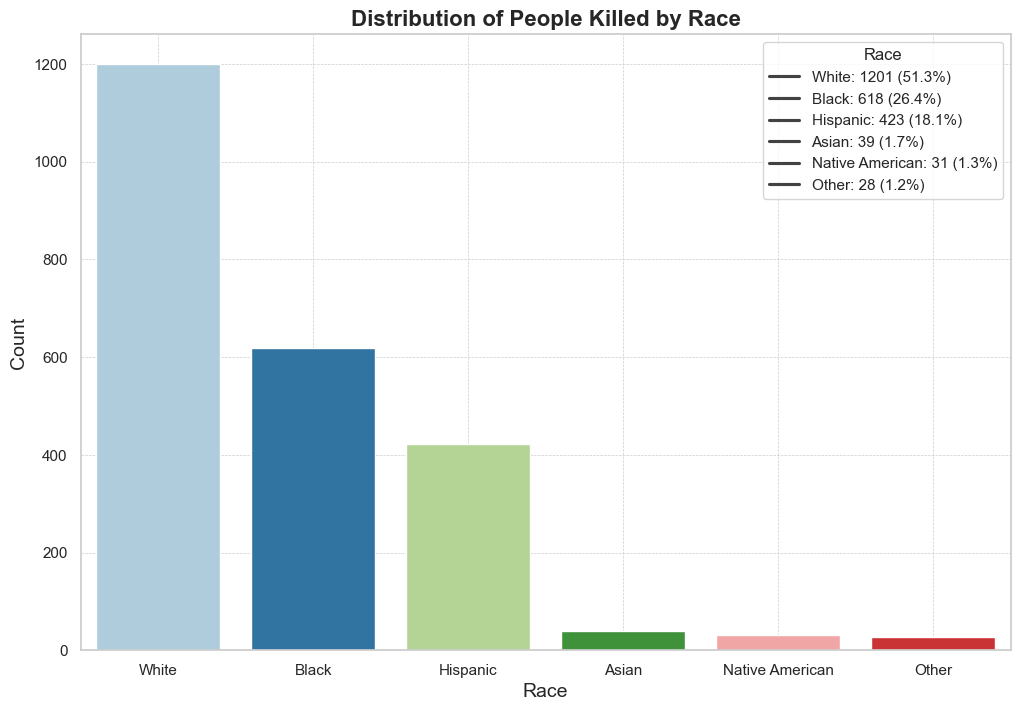

In [ ]:
# Set the Seaborn style
sns.set_style(style="whitegrid")

# Define a color palette
colors = sns.color_palette("Paired", len(race_counts))

# Create a bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x=race_counts.index,
    y=race_counts.values,
    palette=colors,
    hue= race_counts.index
)

# Customize the plot
bar_plot.set_title('Distribution of People Killed by Race', fontsize=16, fontweight='bold')
bar_plot.set_xlabel('Race', fontsize=14)
bar_plot.set_ylabel('Count', fontsize=14)
bar_plot.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend with death count and percentage
legend_labels = [f'{race}: {count} ({pct:.1f}%)' for race, count, pct in zip(race_counts.index, race_counts.values, race_counts.values / race_counts.sum() * 100)]
plt.legend(legend_labels, title="Race", loc="upper right")

# Display the plot
plt.show()


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

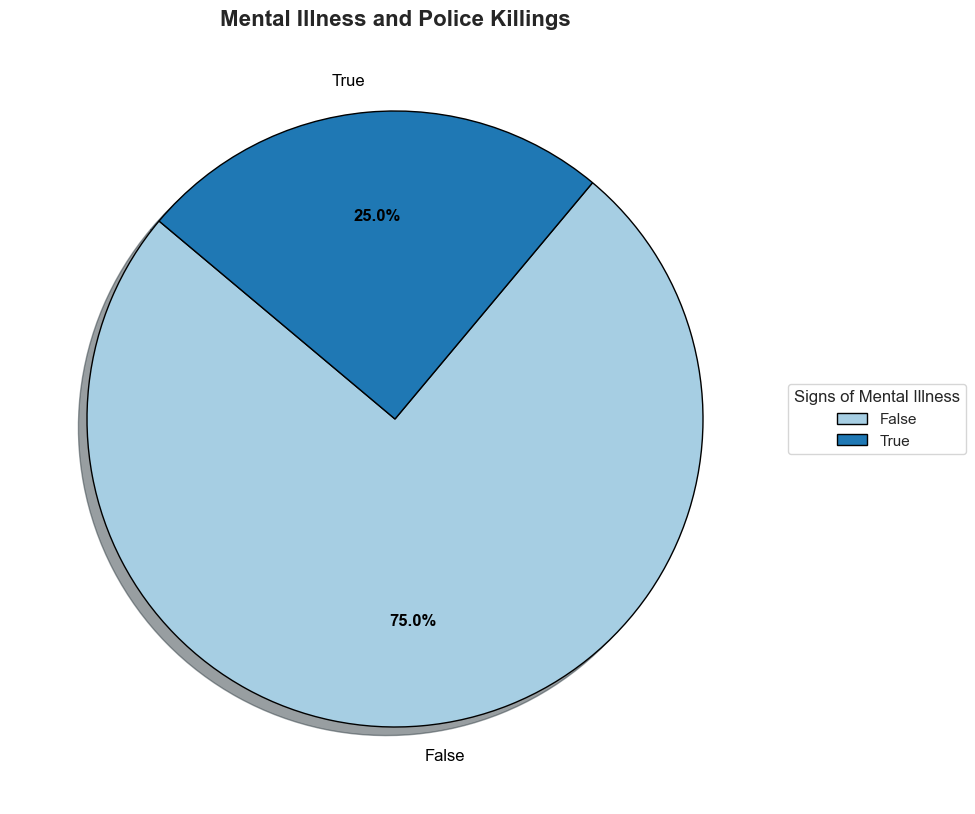

In [ ]:
# Check for NaN values in 'signs_of_mental_illness' column
df_fatalities.signs_of_mental_illness.isna().sum()

# Grouping the people based on their mental illness
mental_illness_df = df_fatalities.signs_of_mental_illness.value_counts()
mental_illness_df.head()

# Set the Seaborn style
sns.set_style(style="whitegrid")

# Define a color palette
colors = sns.color_palette("Paired", len(mental_illness_df))

# Function to format the autopct text
def autopct_format(pct):
    return f'{pct:.1f}%'

# Creating a pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    mental_illness_df.values, 
    labels=mental_illness_df.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}, 
    shadow=True
)

# Customize the text and autotext
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_weight('bold')
    # Move the autotext outside the pie chart
    autotext.set_position((1.1 * autotext.get_position()[0], 1.1 * autotext.get_position()[1]))

# Adding a title
plt.title('Mental Illness and Police Killings', fontsize=16, fontweight='bold')

# Adding a legend
plt.legend(wedges, mental_illness_df.index, title="Signs of Mental Illness", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the plot
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

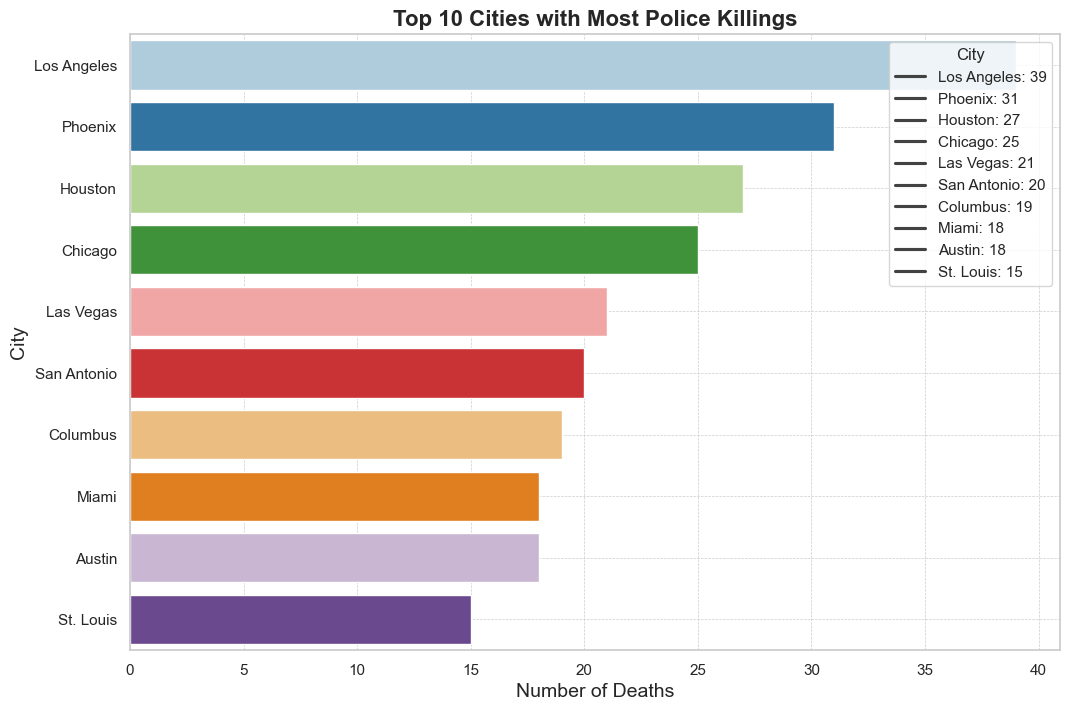

In [ ]:
# Check for NaN values in 'city' column
df_fatalities.city.isna().sum()

# Create a DataFrame for the top 10 cities with the most deaths
city_df = df_fatalities.city.value_counts().head(10).reset_index()
city_df.columns = ['city', 'count']

# Set the Seaborn style
sns.set_style("whitegrid")

# Define a color palette
colors = sns.color_palette("Paired", len(city_df))

# Create a bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x='count',
    y='city',
    data=city_df,
    palette=colors,
    hue='city'
)

# Customize the plot
bar_plot.set_title('Top 10 Cities with Most Police Killings', fontsize=16, fontweight='bold')
bar_plot.set_xlabel('Number of Deaths', fontsize=14)
bar_plot.set_ylabel('City', fontsize=14)
bar_plot.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend with death count
legend_labels = [f'{city}: {count}' for city, count in zip(city_df['city'], city_df['count'])]
plt.legend(legend_labels, title="City", loc="upper right")

# Display the plot
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

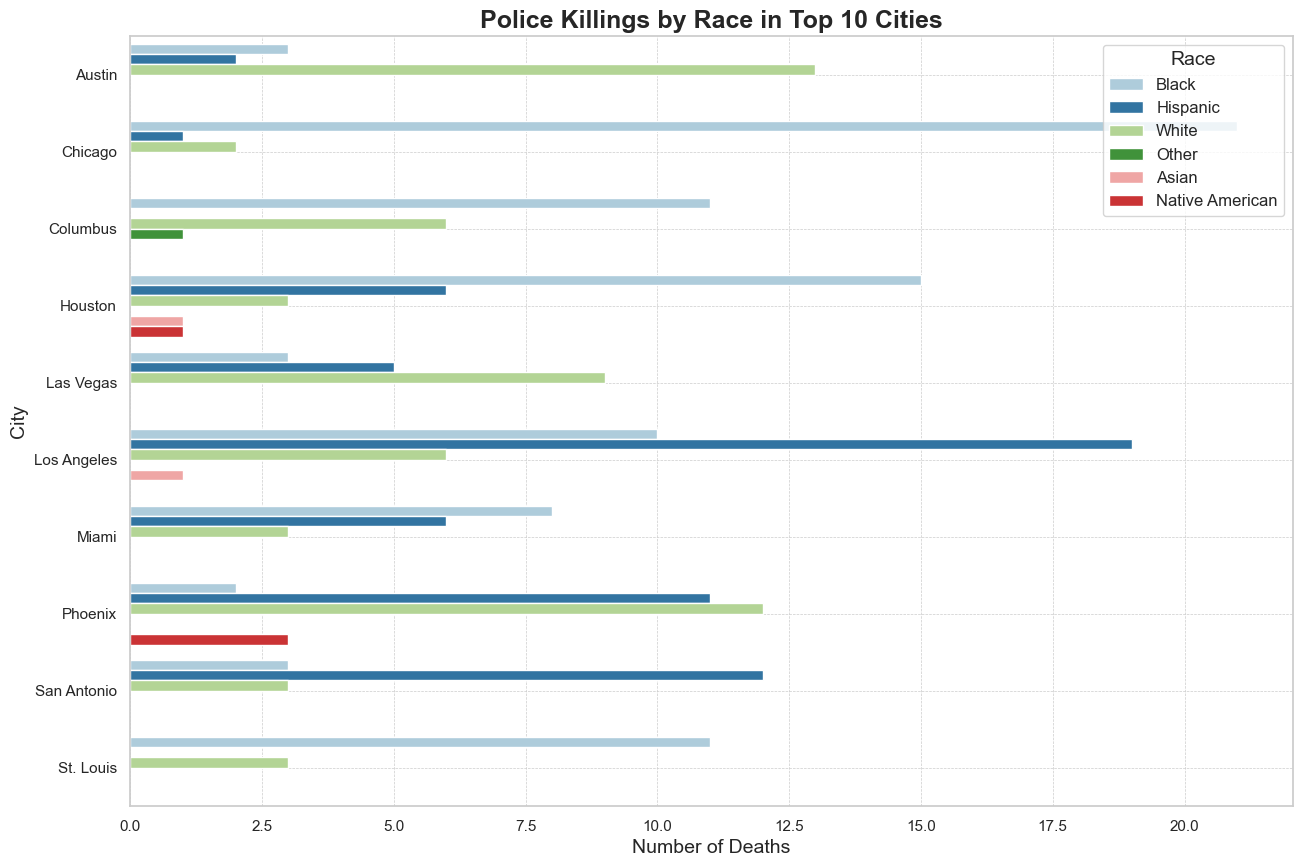

In [ ]:
# Group the data by city and race, and count the occurrences
race_city_df = df_fatalities.groupby(['city', 'race']).agg(death_count=('id', 'count')).reset_index()

# Filter for the top 10 cities with the most deaths
top_10_cities = city_df['city'].tolist()
race_city_df = race_city_df[race_city_df['city'].isin(top_10_cities)]

# Map race codes to full names
race_mapping = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other'
}
race_city_df['race'] = race_city_df['race'].map(race_mapping)

# Set the Seaborn style
sns.set_style("whitegrid")

# Define a color palette
colors = sns.color_palette("Paired", len(race_city_df['race'].unique()))

# Create a bar chart
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(
    x='death_count',
    y='city',
    hue='race',
    data=race_city_df,
    palette=colors
)

# Customize the plot
bar_plot.set_title('Police Killings by Race in Top 10 Cities', fontsize=18, fontweight='bold')
bar_plot.set_xlabel('Number of Deaths', fontsize=14)
bar_plot.set_ylabel('City', fontsize=14)
bar_plot.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding xticks for more professional data visualization
plt.legend(title="Race", loc="upper right", fontsize=12, title_fontsize=14)

# Display the plot
plt.show()

In [ ]:
race_city_df

,city,race,death_count
73,Austin,Black,3
74,Austin,Hispanic,2
75,Austin,White,13
263,Chicago,Black,21
264,Chicago,Hispanic,1
265,Chicago,White,2
319,Columbus,Black,11
320,Columbus,Other,1
321,Columbus,White,6
644,Houston,Asian,1


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [18]:
# Compute death counts per state
death_per_state = df_fatalities.state.value_counts()

# Convert to DataFrame
death_per_state = death_per_state.reset_index()

# Rename the columns
death_per_state.columns = ['state', 'death_count']

# Display the result
print(death_per_state.head())


  state  death_count
0    CA          424
1    TX          225
2    FL          154
3    AZ          118
4    OH           79


In [19]:
# Load U.S. States GeoJSON
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

# Create the choropleth map
fig = px.choropleth(
    death_per_state,
    geojson=geojson_url,
    locations='state',  # Column in df that matches the GeoJSON "name" property
    locationmode='USA-states',  # Specific mode for US state data
    featureidkey="properties.name",  # Match GeoJSON properties.name with df state names
    color='death_count',  # Column for color intensity
    color_continuous_scale="Viridis",  # Color scale
    scope="usa",  # Restrict map to USA
    title="Choropleth Map of U.S. States",
)
 
# Customize the layout to center the map
fig.update_geos(
    center={"lat": 37.0902, "lon": -95.7129},  # Approximate center of the USA
    fitbounds="locations",  # Ensure the map fits the data
    visible=False
)

# Adjust margins for better centering
fig.update_layout(
    margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Remove extra space around the map
    title_x=0.5  # Center the title horizontally
)

# Show the figure
fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

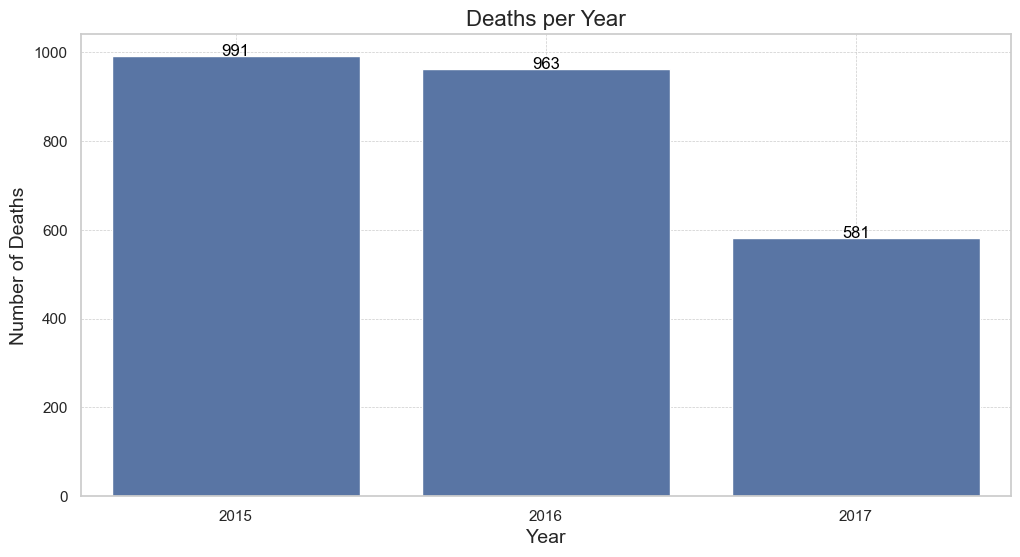

In [ ]:
# Convert the 'date' column to datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='mixed')

# Create a new column named 'year'
df_fatalities['year'] = df_fatalities['date'].dt.year

# Create a DataFrame with the number of police deaths per year
death_per_year = df_fatalities['year'].value_counts().reset_index()
death_per_year.columns = ['year', 'count']
death_per_year = death_per_year.sort_values(by='year')

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.set_theme(style='whitegrid')
bar_plot = sns.barplot(
    data=death_per_year,
    x='year',
    y='count'
)

# Customize the plot
bar_plot.set_title('Deaths per Year', fontsize=16)
bar_plot.set_xlabel('Year', fontsize=14)
bar_plot.set_ylabel('Number of Deaths', fontsize=14)
bar_plot.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels to each bar
for index, row in death_per_year.iterrows():
    bar_plot.text(row.name, row['count'], row['count'], color='black', ha="center")

# Display the plot
plt.show()


# Epilogue

 Read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).